In [1]:
# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# -------------------------
# 2. Load Dataset
# -------------------------
df = pd.read_csv("cardio_train.csv", sep=';')

In [3]:
# -------------------------
# 3. Preprocessing
# -------------------------
df['age'] = (df['age'] / 365).round().astype(int)  # Convert age to years
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# -------------------------
# 4. Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# -------------------------
# 5. Train Model
# -------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# -------------------------
# 6. Evaluate Model
# -------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Model Accuracy: 0.7037857142857142

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      6988
           1       0.71      0.70      0.70      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



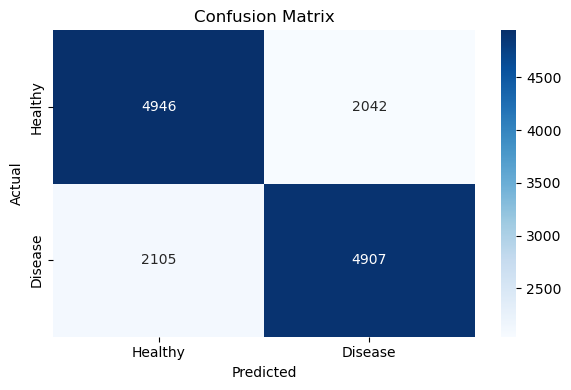

In [7]:
# -------------------------
# 7. Visualize Confusion Matrix
# -------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Save the plot
plt.show()

In [8]:
# -------------------------
# 8. Save Model and Scaler
# -------------------------
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("heart_disease_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)